In [1]:
from cnn.model import build_net
import tensorflow as tf

2022-10-15 14:51:44.047568: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-15 14:51:44.047595: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
layer_list = [
    'vgg_d_3',
    'vgg_n_3',
    'vgg_n_3',
    'vgg_d_3',
    'vgg_n_3',
    'vgg_n_3',
    'vgg_u_3',
    'vgg_n_3',
    'vgg_u_3',
    'vgg_n_3',
]

layer_list = [
    'vgg_d_3', 
    'ide_u', 
    'vgg_n_3', 
    'ide_u', 
    'vgg_n_3', 
    'ide_n', 
    'vgg_n_3', 
    'ide_d', 
    'vgg_u_3', 
    'ide_d'
]


# cell_list = [
#     "NonscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "DownscalingCell",
#     "NonscalingCell",
# ]

fn_dict =  {
    'den_d_3': {'cell': 'DownscalingCell', 'block': 'DenseBlock',     'kernel': 3},
    'den_d_5': {'cell': 'DownscalingCell', 'block': 'DenseBlock',     'kernel': 5},
    'den_d_7': {'cell': 'DownscalingCell', 'block': 'DenseBlock',     'kernel': 7},
    'den_n_3': {'cell': 'NonscalingCell',  'block': 'DenseBlock',     'kernel': 3},
    'den_n_5': {'cell': 'NonscalingCell',  'block': 'DenseBlock',     'kernel': 5},
    'den_n_7': {'cell': 'NonscalingCell',  'block': 'DenseBlock',     'kernel': 7},
    'den_u_3': {'cell': 'UpscalingCell',   'block': 'DenseBlock',     'kernel': 3},
    'den_u_5': {'cell': 'UpscalingCell',   'block': 'DenseBlock',     'kernel': 5},
    'den_u_7': {'cell': 'UpscalingCell',   'block': 'DenseBlock',     'kernel': 7},
    'inc_d_3': {'cell': 'DownscalingCell', 'block': 'InceptionBlock', 'kernel': 3},
    'inc_d_5': {'cell': 'DownscalingCell', 'block': 'InceptionBlock', 'kernel': 5},
    'inc_d_7': {'cell': 'DownscalingCell', 'block': 'InceptionBlock', 'kernel': 7},
    'inc_n_3': {'cell': 'NonscalingCell',  'block': 'InceptionBlock', 'kernel': 3},
    'inc_n_5': {'cell': 'NonscalingCell',  'block': 'InceptionBlock', 'kernel': 5},
    'inc_n_7': {'cell': 'NonscalingCell',  'block': 'InceptionBlock', 'kernel': 7},
    'inc_u_3': {'cell': 'UpscalingCell',   'block': 'InceptionBlock', 'kernel': 3},
    'inc_u_5': {'cell': 'UpscalingCell',   'block': 'InceptionBlock', 'kernel': 5},
    'inc_u_7': {'cell': 'UpscalingCell',   'block': 'InceptionBlock', 'kernel': 7},
    'ide_d':   {'cell': 'DownscalingCell', 'block': 'IdentityBlock',             },
    'ide_n':   {'cell': 'NonscalingCell',  'block': 'IdentityBlock',             },   
    'ide_u':   {'cell': 'UpscalingCell',   'block': 'IdentityBlock',             },
    'res_d_3': {'cell': 'DownscalingCell', 'block': 'ResNetBlock',    'kernel': 3},
    'res_d_5': {'cell': 'DownscalingCell', 'block': 'ResNetBlock',    'kernel': 5},
    'res_d_7': {'cell': 'DownscalingCell', 'block': 'ResNetBlock',    'kernel': 7},
    'res_n_3': {'cell': 'NonscalingCell',  'block': 'ResNetBlock',    'kernel': 3},
    'res_n_5': {'cell': 'NonscalingCell',  'block': 'ResNetBlock',    'kernel': 5},
    'res_n_7': {'cell': 'NonscalingCell',  'block': 'ResNetBlock',    'kernel': 7},
    'res_u_3': {'cell': 'UpscalingCell',   'block': 'ResNetBlock',    'kernel': 3},
    'res_u_5': {'cell': 'UpscalingCell',   'block': 'ResNetBlock',    'kernel': 5},
    'res_u_7': {'cell': 'UpscalingCell',   'block': 'ResNetBlock',    'kernel': 7},
    'vgg_d_3': {'cell': 'DownscalingCell', 'block': 'VGGBlock',       'kernel': 3},
    'vgg_d_5': {'cell': 'DownscalingCell', 'block': 'VGGBlock',       'kernel': 5},
    'vgg_d_7': {'cell': 'DownscalingCell', 'block': 'VGGBlock',       'kernel': 7},
    'vgg_n_3': {'cell': 'NonscalingCell',  'block': 'VGGBlock',       'kernel': 3},
    'vgg_n_5': {'cell': 'NonscalingCell',  'block': 'VGGBlock',       'kernel': 5},
    'vgg_n_7': {'cell': 'NonscalingCell',  'block': 'VGGBlock',       'kernel': 7},
    'vgg_u_3': {'cell': 'UpscalingCell',   'block': 'VGGBlock',       'kernel': 3},
    'vgg_u_5': {'cell': 'UpscalingCell',   'block': 'VGGBlock',       'kernel': 5},
    'vgg_u_7': {'cell': 'UpscalingCell',   'block': 'VGGBlock',       'kernel': 7},
}

In [3]:
patch_size = (128, 128)
batch_size = 32
num_classes = 2
stem_filters = 32
max_depth = 4

In [4]:
model = build_net((*patch_size, 1), stem_filters, max_depth, num_classes, fn_dict, layer_list)#, cell_list)
model.summary()

2022-10-15 14:51:45.033955: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-15 14:51:45.034075: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-15 14:51:45.034081: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-15 14:51:45.034097: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (guilherme): /proc/driver/nvidia/version does not exist
2022-10-15 14:51:45.034641: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Model: "net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
StemConvolution_Convolution_Con (None, 128, 128, 32) 288         input[0][0]                      
__________________________________________________________________________________________________
StemConvolution_Normalization_N (None, 128, 128, 32) 128         StemConvolution_Convolution_Convo
__________________________________________________________________________________________________
StemConvolution_Activation_ReLU (None, 128, 128, 32) 0           StemConvolution_Normalization_Nor
________________________________________________________________________________________________

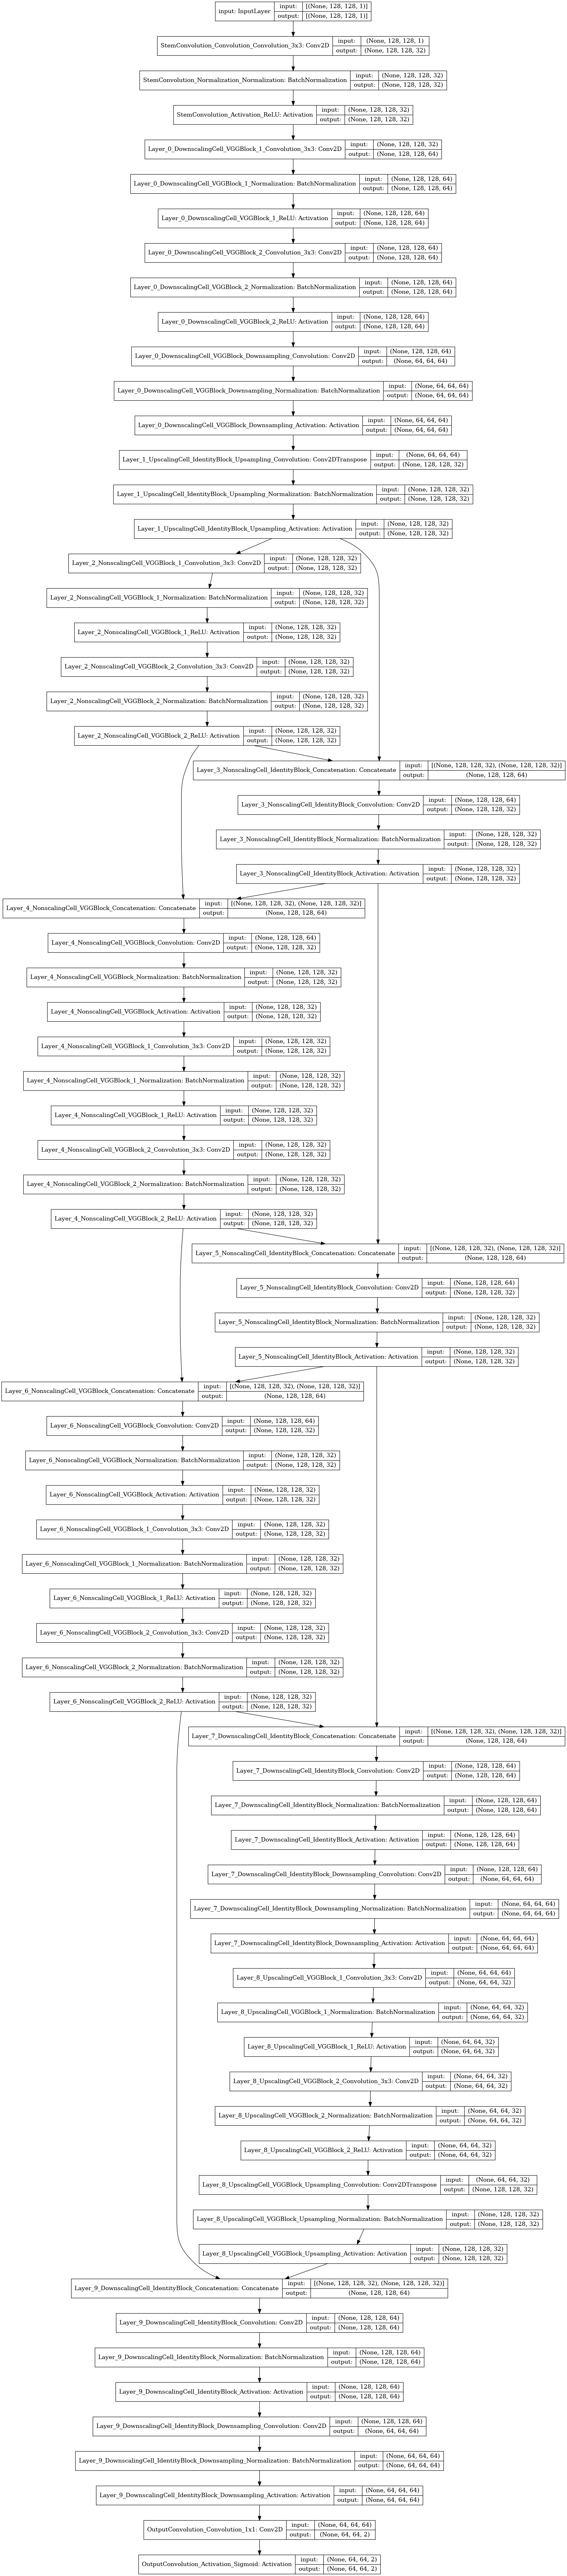

In [5]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(
        model,
        to_file='model.png',
        show_shapes=True,
        show_layer_names=True,
        rankdir='TB'
)

Image('model.png')